In [13]:
import spacy
from collections import Counter
nlp = spacy.load('en')

In [4]:
def make_verb_upper(text, pos):
    return text.upper() if pos == "VERB" else text

In [5]:
doc = nlp(u'Tom ran swiftly and walked slowly')
text = ''.join(make_verb_upper(w.text_with_ws, w.pos_) for w in doc)
print(text)

Tom RAN swiftly and WALKED slowly


- func makes verbs uppercase


Another popular task often done during analysis of text is to count the occurrences of each kind of POS. This can be done quite quickly with the following code snippet, where we find out the number of occurrences of these words in the 1st Harry Potter book (which you would buy/download and save as a text file):

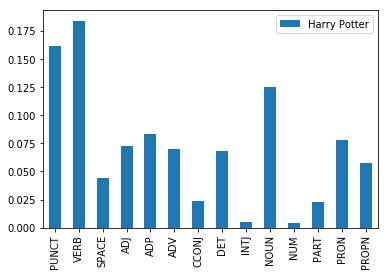

In [8]:
import pandas as pd

harry_potter = open("docs/HP1.txt").read()
hp = nlp(harry_potter)
hpSents = list(hp.sents)
hpSentenceLengths = [len(sent) for sent in hpSents]
[sent for sent in hpSents if len(sent) == max(hpSentenceLengths)]
hpPOS = pd.Series(hp.count_by(spacy.attrs.POS))/len(hp)
 
tagDict = {w.pos: w.pos_ for w in hp}
hpPOS = pd.Series(hp.count_by(spacy.attrs.POS))/len(hp)
df = pd.DataFrame([hpPOS], index=['Harry Potter'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')

The y-axis is the percentage of that POS-tag appearing in the text.

What if we want to find the most commonly used pronouns? We only need two lines for this task:

In [14]:
hpAdjs = [w for w in hp if w.pos_ == 'PRON']
Counter([w.string.strip() for w in hpAdjs]).most_common(10)

[('he', 102),
 ('it', 58),
 ('He', 54),
 ('I', 46),
 ('you', 33),
 ('It', 28),
 ('him', 26),
 ('they', 25),
 ('she', 20),
 ('them', 17)]

Knowledge of POS-tags can help us with a more in-depth text analysis. It is a pillar of natural language processing, and after the tokenizing text is usually the first piece of analysis which we carry out. spaCy offers us the best way to perform POS-tagging, but we have had a look at all the other options that Python gives us as well. We will be sticking with spaCy for the rest of the computational linguistics tasks we will be exploring, such as NER-tagging and dependency parsing in the next chapters.



## Summary
We've explored in this chapter how to use spaCy as part of our pipelines, and in particular how to extract POS-tags. We discussed what POS-tags are, and how they can be useful in different kinds of analysis. We soon moved on to training your own POS-tagger in spaCy and looked at different examples where we use POS-tags. We will now explore other spaCy functionalities such as NER-tagging and dependency parsing.